# Do super heroes who have "Super Strength" weigh more than those who do not?

- Null Hypothesis: There is no significant difference between the weight of superheroes with or without "super strength".

- Alternate Hypothesis: There is a significant difference between the weight of superheroes who have "super strength" and those who do not.  

- Significance Level (Alpha): For this test, our alpha value is 0.05. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

url = 'https://docs.google.com/spreadsheets/d/1EvADR_JB1Y7tQDGvu-5aBoCEPPS-Dqyca3YY_Jjakdw/gviz/tq?tqx=out:csv&sheet=Cleaned_Super_Hero'
df = pd.read_csv(url)
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122,...,False,False,False,False,False,False,False,False,False,False


In [2]:
# see how many with and without strength
df['Super Strength'].value_counts()

# Filtering out those with and without super strength
strength_df = df.loc[df['Super Strength']== True].copy()
no_strength_df = df.loc[df['Super Strength']== False].copy()

#Define our feature of interest
strength_weight = strength_df['Weight']
no_strength_weight = no_strength_df['Weight']

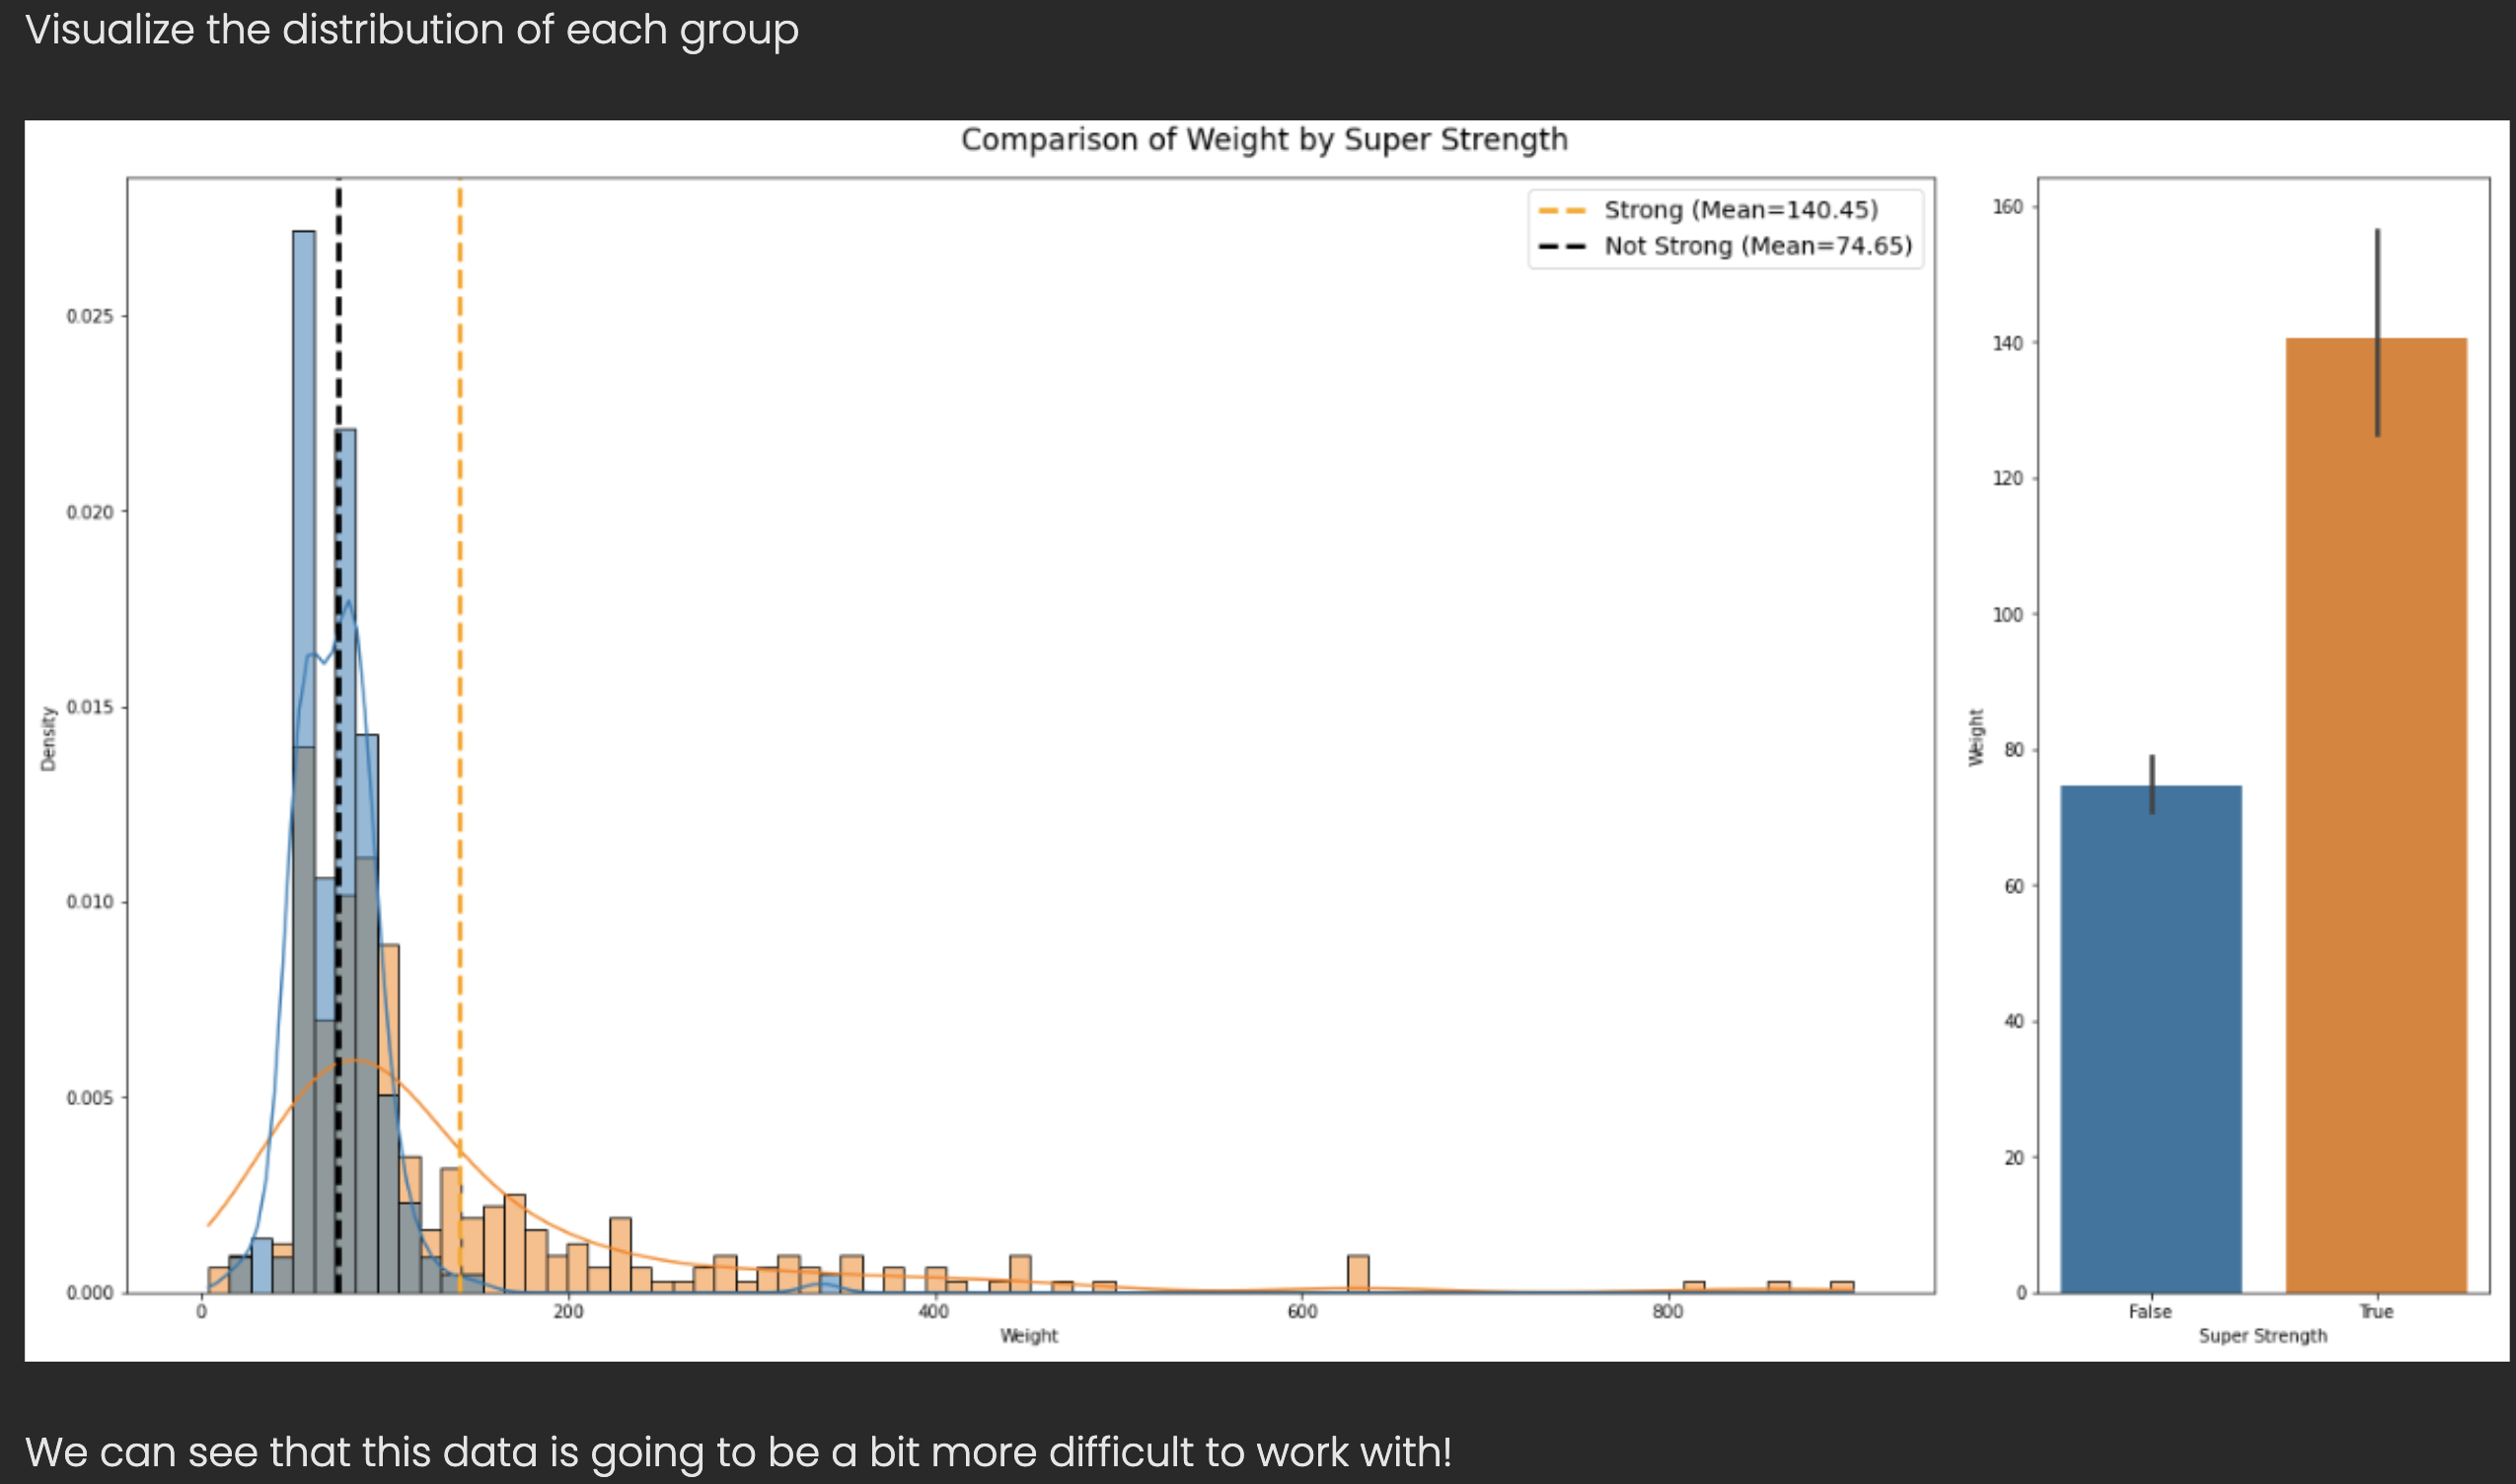

In [ ]:
gender_palette={'Male':'dodgerblue', "Female":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='Height',fill=True,hue='Gender',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(male_height), ls='--',lw=3, 
           label=f"Males (Mean={np.mean(male_height):.2f})",color=gender_palette['Male'])

ax.axvline(np.mean(female_height), ls='--', lw=3, 
           label=f"Females (Mean={np.mean(female_height):.2f})",color=gender_palette['Female'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='Gender',y='Height',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Weight by Super Strength',fontsize='xx-large');

# Check for and remove outliers


In [7]:
# Check for outliers in weight for strength group
zscores= stats.zscore(strength_weight)
outliers = abs(zscores)>3
print(np.sum(outliers))
# remove outliers from strength group
strength_weight = strength_weight[(np.abs(stats.zscore(strength_weight)) < 3)]

7


In [6]:
#check for outliers in weight for no strength group
zscores= stats.zscore(no_strength_weight)
outliers = abs(zscores)>3
np.sum(outliers)

# remove outlier for no strength group
no_strength_weight = no_strength_weight[(np.abs(stats.zscore(no_strength_weight)) < 3)]

# Check for Normality

In [8]:
# test the strength group for normality
result_strength_weight = stats.normaltest(strength_weight)
result_no_strength_weight = stats.normaltest(no_strength_weight)

print(result_strength_weight)
print(result_no_strength_weight)

#p-values for both groups are below 0.05, means our data is NOT normally distributed.  
#However, our sample size is large enough to proceed without satisfying this test.  
#For an independent t-test, sample sizes of 15 per group are considered sufficient.

NormaltestResult(statistic=73.39820093617973, pvalue=1.1528775331471331e-16)
NormaltestResult(statistic=10.034466263303866, pvalue=0.006622825869229763)


In [9]:
# check for equal variance
# Test for equal variance
result = stats.levene(strength_weight, no_strength_weight)
result

#Looks like we don't have equal variances, but that won't stop us! 
#We just need to be sure to include "equal_var = False" when we perform our t-test.

LeveneResult(statistic=54.87517929682402, pvalue=6.614800169399976e-13)

# Perform and evaluate the t-test

In [10]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(strength_weight, no_strength_weight, equal_var = False)
result

Ttest_indResult(statistic=8.681298862674023, pvalue=2.2378818600675397e-16)

Our p-value < alpha (0.05), so we reject the null hypothesis and **accept that there is a significant difference between the weights of superheroes who have "super strength" and those who do not.**